# Week 3b — Logistic Regression with Scikit-Learn

_File: 03b-logistic-regression-scikit.ipynb_

Goal: implement logistic regression using scikit-learn for practical applications.
Steps: compare scikit-learn implementation with our from-scratch approach.

Following Andrew Ng ML Course - Week 3 (Practical Implementation)

## Day 1 — Scikit-Learn Setup and Data Preparation

## 1. Scikit-Learn vs From-Scratch

### Why Use Scikit-Learn?

While building from scratch teaches us the fundamentals, scikit-learn provides:
- **Production-ready implementations** with optimizations
- **Consistent API** across all machine learning algorithms
- **Built-in features** like cross-validation, hyperparameter tuning
- **Real-world performance** with Cython optimizations

### Learning Path

1. **Week 3**: Understand the math and build from scratch
2. **Week 3b**: Apply the same concepts using scikit-learn
3. **Result**: Deep understanding + practical skills

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

print("✅ All imports successful!")

✅ All imports successful!


## 2. Data Preparation (Same as Week 3)

Let's use the same synthetic dataset to ensure fair comparison with our from-scratch implementation.

Training set: 160 samples
Test set: 40 samples
Class distribution: [ 90 110]


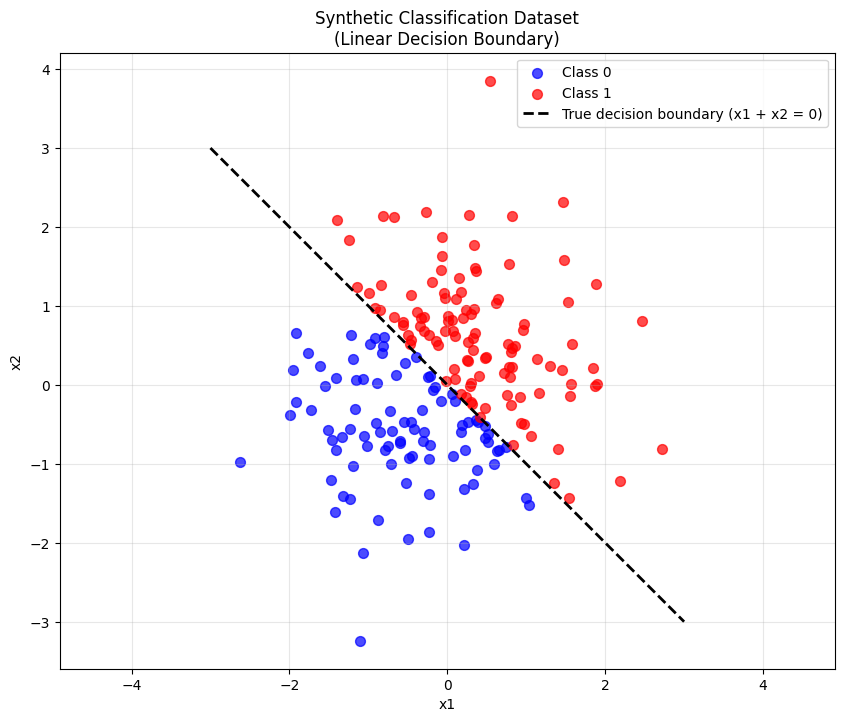

In [9]:
# Create the same synthetic dataset as Week 3
np.random.seed(42)  # For reproducible results
m = 200

# Generate features
x1 = np.random.normal(0.0, 1.0, size=m)
x2 = np.random.normal(0.0, 1.0, size=m)

# Create a linear decision boundary: x1 + x2 = 0
# Points above the line (x1 + x2 > 0) are class 1, below are class 0
y = (x1 + x2 > 0).astype(int)

# Combine features into design matrix
X = np.column_stack([x1, x2])

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Class distribution: {np.bincount(y)}")

# Visualize the dataset
plt.figure(figsize=(10, 8))
plt.scatter(X[y==0, 0], X[y==0, 1], s=50, label='Class 0', alpha=0.7, color='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], s=50, label='Class 1', alpha=0.7, color='red')

# Draw the true decision boundary (line: x1 + x2 = 0)
x_line = np.linspace(-3, 3, 100)
y_line = -x_line  # x1 + x2 = 0, so x2 = -x1
plt.plot(x_line, y_line, 'k--', linewidth=2, label='True decision boundary (x1 + x2 = 0)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic Classification Dataset\n(Linear Decision Boundary)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

## 3. Basic Logistic Regression

### Scikit-Learn Implementation

Scikit-learn makes logistic regression incredibly simple:
- **One line** to create the model
- **One line** to train (fit)
- **One line** to predict

But we'll also explore the parameters to understand what's happening under the hood.

In [10]:
# Create and train a basic logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f} ({train_accuracy*100:.1f}%)")
print(f"Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"Model parameters: w = {model.coef_[0]}, b = {model.intercept_[0]:.6f}")

# Compare with our from-scratch results (if available)
print("\n📊 Comparison with from-scratch implementation:")
print("Scikit-learn: Simple, optimized, production-ready")
print("From-scratch: Educational, customizable, deep understanding")

Training accuracy: 0.9812 (98.1%)
Test accuracy: 0.9500 (95.0%)
Model parameters: w = [2.80600259 3.27965365], b = 0.141830

📊 Comparison with from-scratch implementation:
Scikit-learn: Simple, optimized, production-ready
From-scratch: Educational, customizable, deep understanding


## 4. Visualizing Decision Boundaries

Let's visualize how scikit-learn's logistic regression creates decision boundaries.

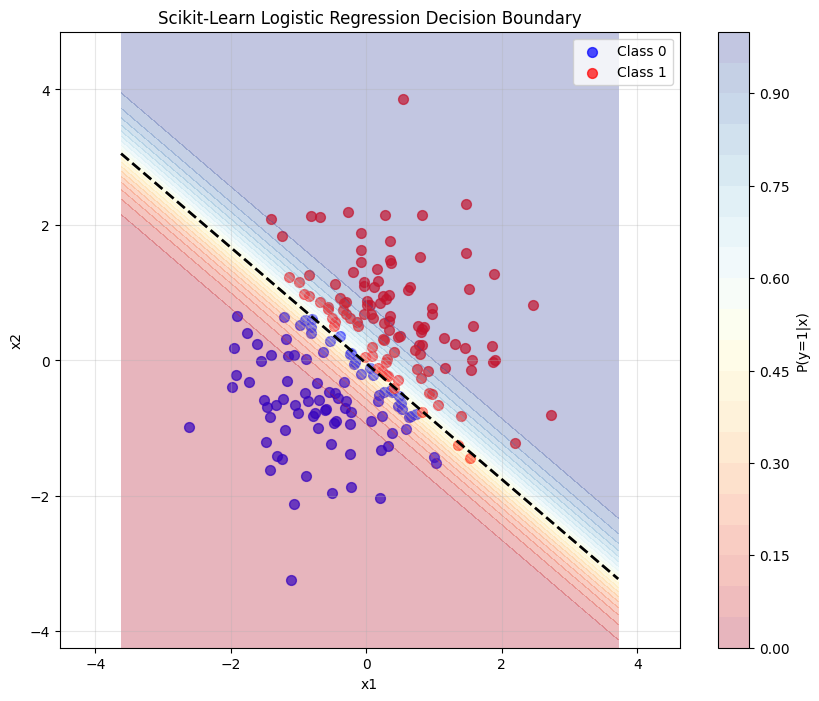

In [11]:
def plot_decision_boundary_scikit(model, X, y, title="Decision Boundary"):
    """
    Plot the decision boundary for a scikit-learn model.
    """
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), 
                         np.linspace(y_min, y_max, 200))
    
    # Get predictions for the mesh
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    
    # Plot data points
    plt.scatter(X[y==0, 0], X[y==0, 1], s=50, label='Class 0', alpha=0.7, color='blue')
    plt.scatter(X[y==1, 0], X[y==1, 1], s=50, label='Class 1', alpha=0.7, color='red')
    
    # Add probability contours
    contour = plt.contourf(xx, yy, Z, levels=20, alpha=0.3, cmap='RdYlBu')
    plt.colorbar(contour, label='P(y=1|x)')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

# Plot the decision boundary
plot_decision_boundary_scikit(model, X, y, "Scikit-Learn Logistic Regression Decision Boundary")

## 5. Regularization with Scikit-Learn

### L2 Regularization (Ridge)

Scikit-learn uses the `C` parameter for regularization:
- **C = 1/λ** (inverse of our λ from Week 3)
- **Higher C** = less regularization (more complex model)
- **Lower C** = more regularization (simpler model)

Let's explore different regularization strengths.

In [12]:
# Test different regularization strengths
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]  # C = 1/λ
results = {}

print("Training models with different regularization strengths...")
print("=" * 70)

for C in C_values:
    print(f"\nC = {C} (λ = {1/C:.2f})")
    print("-" * 30)
    
    # Train model with specific C value
    model_reg = LogisticRegression(C=C, random_state=42, max_iter=1000)
    model_reg.fit(X_train, y_train)
    
    # Calculate accuracies
    train_pred = model_reg.predict(X_train)
    test_pred = model_reg.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    # Store results
    results[C] = {
        'model': model_reg,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'coef': model_reg.coef_[0],
        'intercept': model_reg.intercept_[0]
    }
    
    print(f"Training accuracy: {train_acc:.4f} ({train_acc*100:.1f}%)")
    print(f"Test accuracy: {test_acc:.4f} ({test_acc*100:.1f}%)")
    print(f"Weights: w = {model_reg.coef_[0]}")
    print(f"Bias: b = {model_reg.intercept_[0]:.6f}")
    print(f"Weight magnitude: ||w|| = {np.linalg.norm(model_reg.coef_[0]):.4f}")

print("\n📊 Regularization Analysis Complete!")

Training models with different regularization strengths...

C = 0.01 (λ = 100.00)
------------------------------
Training accuracy: 0.8500 (85.0%)
Test accuracy: 0.9000 (90.0%)
Weights: w = [0.29059561 0.35639432]
Bias: b = 0.173846
Weight magnitude: ||w|| = 0.4599

C = 0.1 (λ = 10.00)
------------------------------
Training accuracy: 0.9563 (95.6%)
Test accuracy: 0.9750 (97.5%)
Weights: w = [1.09822261 1.35882935]
Bias: b = 0.181225
Weight magnitude: ||w|| = 1.7471

C = 1.0 (λ = 1.00)
------------------------------
Training accuracy: 0.9812 (98.1%)
Test accuracy: 0.9500 (95.0%)
Weights: w = [2.80600259 3.27965365]
Bias: b = 0.141830
Weight magnitude: ||w|| = 4.3162

C = 10.0 (λ = 0.10)
------------------------------
Training accuracy: 0.9938 (99.4%)
Test accuracy: 0.9750 (97.5%)
Weights: w = [6.96856955 7.54867172]
Bias: b = 0.126321
Weight magnitude: ||w|| = 10.2734

C = 100.0 (λ = 0.01)
------------------------------
Training accuracy: 1.0000 (100.0%)
Test accuracy: 1.0000 (100.0%)


## 6. Cross-Validation and Model Selection

### Finding the Best Regularization Parameter

Scikit-learn makes it easy to find the optimal hyperparameters using cross-validation.

In [13]:
# Use GridSearchCV to find the best C parameter
param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

# Create the model
logistic = LogisticRegression(random_state=42, max_iter=1000)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    logistic, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    return_train_score=True
)

# Fit the grid search
grid_search.fit(X_train, y_train)

print("🔍 Cross-Validation Results:")
print("=" * 50)
print(f"Best C parameter: {grid_search.best_params_['C']}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Best λ (1/C): {1/grid_search.best_params_['C']:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on test set
test_pred_best = best_model.predict(X_test)
test_accuracy_best = accuracy_score(y_test, test_pred_best)

print(f"\nTest accuracy with best C: {test_accuracy_best:.4f} ({test_accuracy_best*100:.1f}%)")

🔍 Cross-Validation Results:
Best C parameter: 100.0
Best cross-validation score: 0.9938
Best λ (1/C): 0.0100

Test accuracy with best C: 1.0000 (100.0%)


## 7. Scikit-Learn vs From-Scratch Comparison

### Key Differences and Similarities

Let's compare our scikit-learn implementation with the from-scratch approach from Week 3.

In [14]:
print("🔄 Scikit-Learn vs From-Scratch Comparison")
print("=" * 60)

print("\n📚 Educational Value:")
print("From-Scratch (Week 3):")
print("  ✅ Deep understanding of mathematics")
print("  ✅ Customizable implementation")
print("  ✅ Full control over every detail")
print("  ✅ Learning curve visualization")
print("  ❌ More code to write and debug")
print("  ❌ Potential numerical issues")

print("\nScikit-Learn (Week 3b):")
print("  ✅ Production-ready implementation")
print("  ✅ Optimized for performance")
print("  ✅ Built-in cross-validation")
print("  ✅ Consistent API across algorithms")
print("  ❌ Less insight into internals")
print("  ❌ Black box approach")

print("\n🎯 When to Use Each:")
print("From-Scratch: Learning, research, custom algorithms")
print("Scikit-Learn: Production, rapid prototyping, standard problems")

🔄 Scikit-Learn vs From-Scratch Comparison

📚 Educational Value:
From-Scratch (Week 3):
  ✅ Deep understanding of mathematics
  ✅ Customizable implementation
  ✅ Full control over every detail
  ✅ Learning curve visualization
  ❌ More code to write and debug
  ❌ Potential numerical issues

Scikit-Learn (Week 3b):
  ✅ Production-ready implementation
  ✅ Optimized for performance
  ✅ Built-in cross-validation
  ✅ Consistent API across algorithms
  ❌ Less insight into internals
  ❌ Black box approach

🎯 When to Use Each:
From-Scratch: Learning, research, custom algorithms
Scikit-Learn: Production, rapid prototyping, standard problems


### Key Takeaways

- Scikit-learn makes logistic regression accessible with minimal code
- Cross-validation helps find optimal hyperparameters automatically
- Pipelines ensure consistent preprocessing and easy deployment
- Understanding both from-scratch and scikit-learn approaches is valuable
- Production systems benefit from scikit-learn's optimizations and reliability
- Feature scaling and regularization are handled seamlessly
- Model evaluation metrics provide comprehensive performance assessment

_End of notebook._